In [460]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\ltye\OneDrive\Desktop\DA Notes\11 Capstone\insurance_data.csv")
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [461]:
#Articulate the size and shape of the dataset

df.shape

(1340, 11)

In [462]:
df.size

14740

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [464]:
#Comment on data quality with respect to null values or missing data

df.isna().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [465]:
df.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [466]:
df.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [467]:
#remove null values in dataset
health_ins = df.dropna()

#remove index and patient ID columns
health_ins.drop(columns=['index', 'PatientID'], inplace=True)

health_ins.to_csv("C:\\Users\\ltye\\OneDrive\\Desktop\\DA Notes\\11 Capstone\\health_ins.csv", index=False) 

# Check for remaining null values 
print(health_ins.isnull().sum())

age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64


C:\Users\ltye\AppData\Local\Temp\ipykernel_30028\4235748241.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_ins.drop(columns=['index', 'PatientID'], inplace=True)


In [468]:
health_ins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1332 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1332 non-null   float64
 1   gender         1332 non-null   object 
 2   bmi            1332 non-null   float64
 3   bloodpressure  1332 non-null   int64  
 4   diabetic       1332 non-null   object 
 5   children       1332 non-null   int64  
 6   smoker         1332 non-null   object 
 7   region         1332 non-null   object 
 8   claim          1332 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 104.1+ KB


In [469]:
health_ins.describe()

,age,bmi,bloodpressure,children,claim
count,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000
mean,38.086336,30.658333,94.189189,1.099850,13325.246426
std,11.112804,6.118967,11.445173,1.205958,12109.620712
min,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,29.000000,26.200000,86.000000,0.000000,4760.157500
50%,38.000000,30.350000,92.000000,1.000000,9412.965000
75%,47.000000,34.725000,99.000000,2.000000,16781.327500
max,60.000000,53.100000,140.000000,5.000000,63770.430000


In [470]:
health_ins.head(10)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
7,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,30.0,male,53.1,97,No,0,No,northwest,1163.46
10,36.0,male,19.8,88,Yes,0,No,northwest,1241.57
11,37.0,male,20.3,90,Yes,0,No,northwest,1242.26
12,19.0,male,20.7,81,No,0,No,northwest,1242.82
16,35.0,male,34.1,90,No,0,No,southwest,1261.44
17,41.0,male,34.4,84,No,0,No,southwest,1261.86


In [471]:
health_ins.tail(10)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1330,25.0,female,38.1,111,No,0,Yes,southeast,48885.14
1331,18.0,male,41.1,104,No,1,Yes,southeast,48970.25
1332,26.0,male,37.0,120,No,2,Yes,southeast,49577.66
1333,44.0,male,36.4,127,No,1,Yes,southwest,51194.56
1334,43.0,male,32.8,125,No,0,Yes,southwest,52590.83
1335,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,37.0,male,30.4,106,No,0,Yes,southeast,62592.87
1339,30.0,female,47.4,101,No,0,Yes,southeast,63770.43


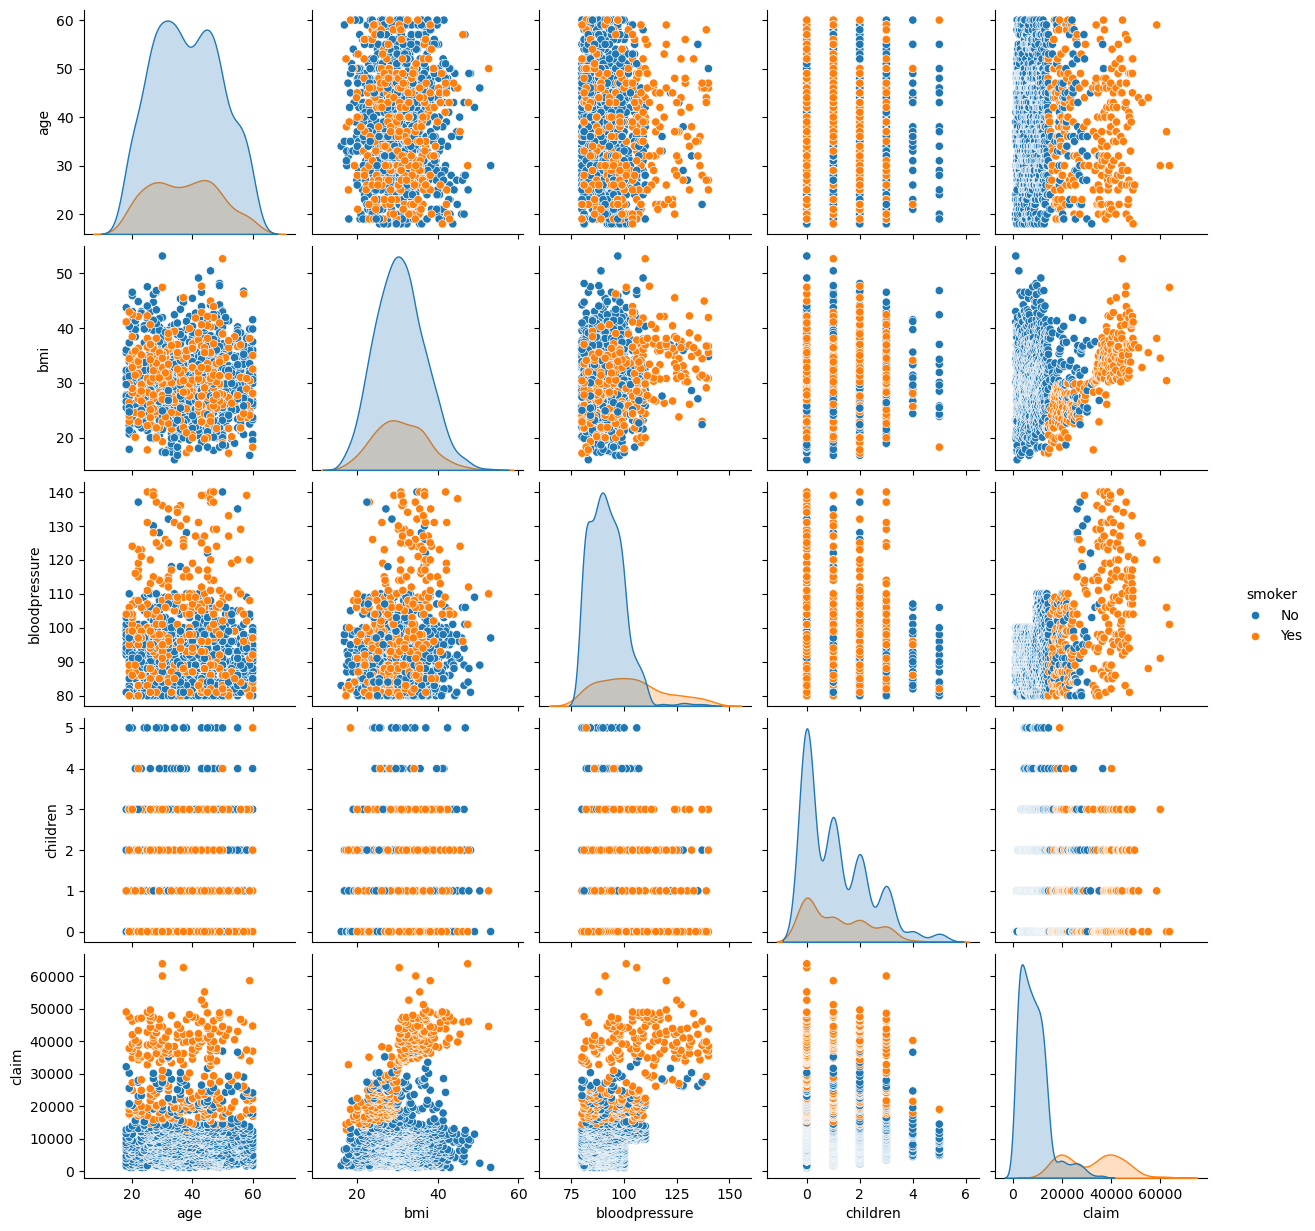

In [472]:
sns.pairplot(health_ins, hue="smoker");

In [473]:
healthcorrel = health_ins.corr(numeric_only = True)
healthcorrel

,age,bmi,bloodpressure,children,claim
age,1.000000,-0.042152,-0.060322,-0.026208,-0.028636
bmi,-0.042152,1.000000,0.144977,0.013719,0.199945
bloodpressure,-0.060322,0.144977,1.000000,-0.034356,0.531263
children,-0.026208,0.013719,-0.034356,1.000000,0.064149
claim,-0.028636,0.199945,0.531263,0.064149,1.000000


<Axes: >

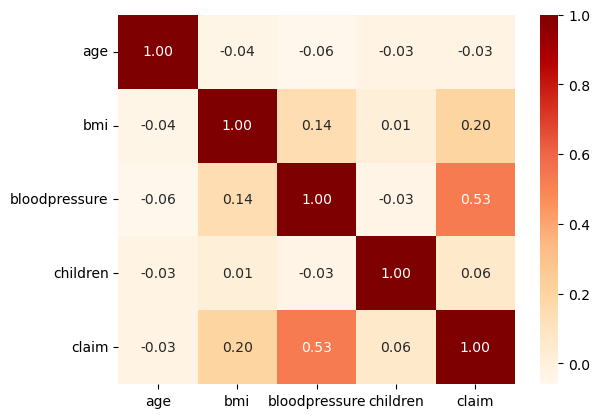

In [881]:
sns.heatmap(healthcorrel, annot = True, fmt='.2f', cmap = 'OrRd')

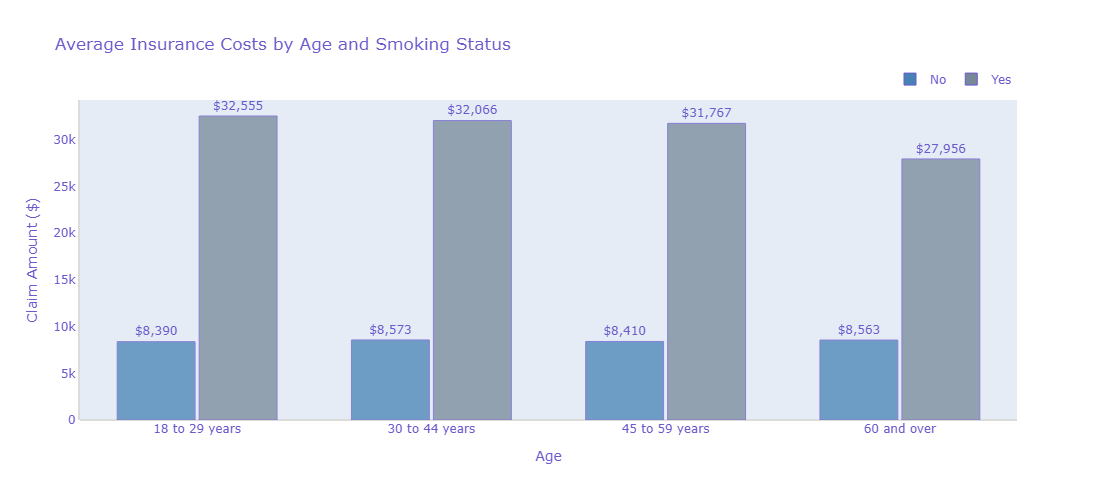

In [811]:
plot_df = health_ins.copy()
plot_df["Age_Group"]=['18 to 29 years' if i<30 else '30 to 44 years' if (i>=30)&(i<45) else 
                      '45 to 59 years' if (i>=45)&(i<60) else '60 and over' for i in health_ins['age']]
plot_df = plot_df.groupby(['Age_Group','smoker'])['claim'].mean()
plot_df = plot_df.rename('claim').reset_index().sort_values('smoker', ascending=True)
fig = px.bar(plot_df, x='Age_Group', y='claim', color='smoker', height=500, text='claim', 
             opacity=0.75, barmode='group', color_discrete_sequence=['#4682B4','#778899'],
             title="Average Insurance Costs by Age and Smoking Status")
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside', 
                  marker_line=dict(width=1, color='#6A5ACD'))
fig.update_layout(font_color="#6A5ACD",bargroupgap=0.05, bargap=0.3, 
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, title=""),
                  xaxis=dict(title='Age',showgrid=False), 
                  yaxis=dict(title='Claim Amount ($)', showgrid=False,zerolinecolor='#DBDBDB',
                             showline=True, linecolor='#DBDBDB', linewidth=2))
fig.show()

In [627]:
pip install plotly

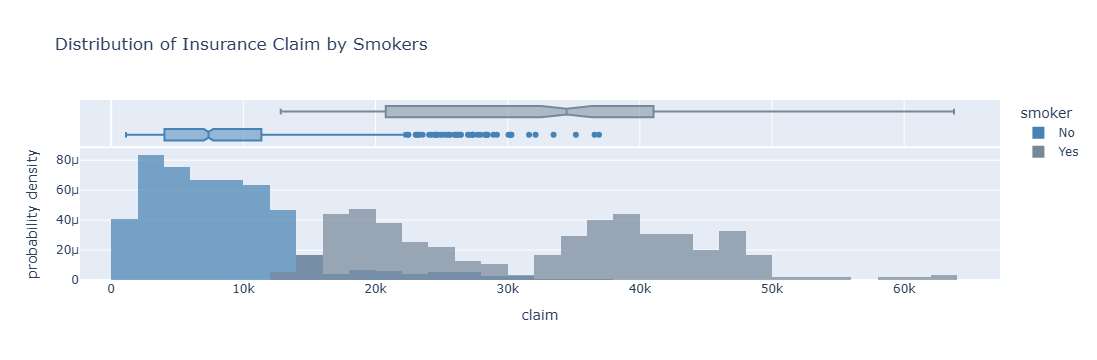

In [817]:
import plotly.express as px

fig = px.histogram(health_ins, x='claim', color='smoker', opacity=0.7, barmode='overlay',
                   histnorm='probability density', marginal='box',
                   title="Distribution of Insurance Claim by Smokers",
                   color_discrete_sequence=['#4682B4','#778899'])

# Show the plot
fig.show()


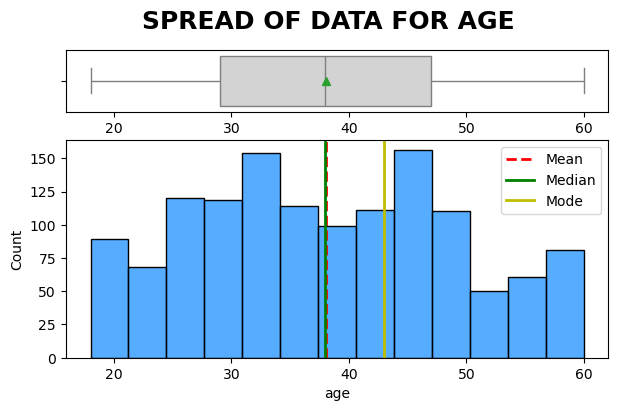

In [705]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the function
def dist_box(data):
    # Function plots a combined graph for univariate analysis of continuous variables 
    # to check spread, central tendency, dispersion, and outliers
    Name = data.name.upper()
    fig, (ax_box, ax_dis) = plt.subplots(2, 1, gridspec_kw={"height_ratios": (.2, .7)}, figsize=(7, 4))
    mean = data.mean()
    median = data.median()
    mode = data.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR " + Name, fontsize=18, fontweight='bold')
    sns.boxplot(x=data, showmeans=True, orient='h', color="lightgrey", ax=ax_box)
    ax_box.set(xlabel='')
    sns.histplot(data, kde=False, color='dodgerblue', ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--', linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-', linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-', linewidth=2)
    plt.legend({'Mean': mean, 'Median': median, 'Mode': mode})


dist_box(health_ins['age'])



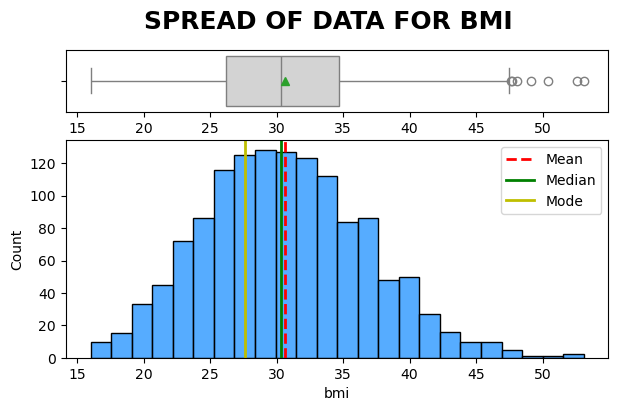

In [707]:
# Define the function
def dist_box(data):
    # Function plots a combined graph for univariate analysis of continuous variables 
    # to check spread, central tendency, dispersion, and outliers
    Name = data.name.upper()
    fig, (ax_box, ax_dis) = plt.subplots(2, 1, gridspec_kw={"height_ratios": (.2, .7)}, figsize=(7, 4))
    mean = data.mean()
    median = data.median()
    mode = data.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR " + Name, fontsize=18, fontweight='bold')
    sns.boxplot(x=data, showmeans=True, orient='h', color="lightgrey", ax=ax_box)
    ax_box.set(xlabel='')
    sns.histplot(data, kde=False, color='dodgerblue', ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--', linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-', linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-', linewidth=2)
    plt.legend({'Mean': mean, 'Median': median, 'Mode': mode})


dist_box(health_ins['bmi'])

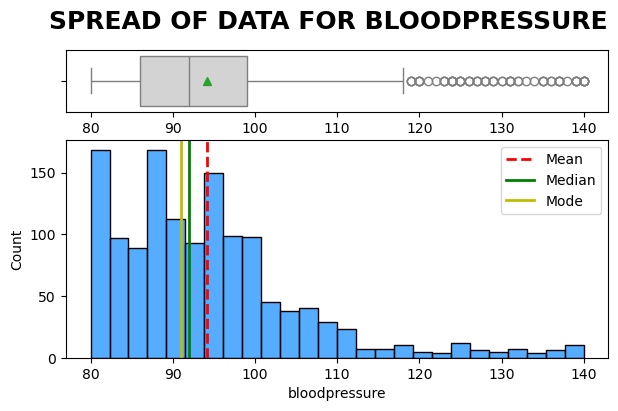

In [709]:
# Define the function
def dist_box(data):
    # Function plots a combined graph for univariate analysis of continuous variables 
    # to check spread, central tendency, dispersion, and outliers
    Name = data.name.upper()
    fig, (ax_box, ax_dis) = plt.subplots(2, 1, gridspec_kw={"height_ratios": (.2, .7)}, figsize=(7, 4))
    mean = data.mean()
    median = data.median()
    mode = data.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR " + Name, fontsize=18, fontweight='bold')
    sns.boxplot(x=data, showmeans=True, orient='h', color="lightgrey", ax=ax_box)
    ax_box.set(xlabel='')
    sns.histplot(data, kde=False, color='dodgerblue', ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--', linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-', linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-', linewidth=2)
    plt.legend({'Mean': mean, 'Median': median, 'Mode': mode})


dist_box(health_ins['bloodpressure'])

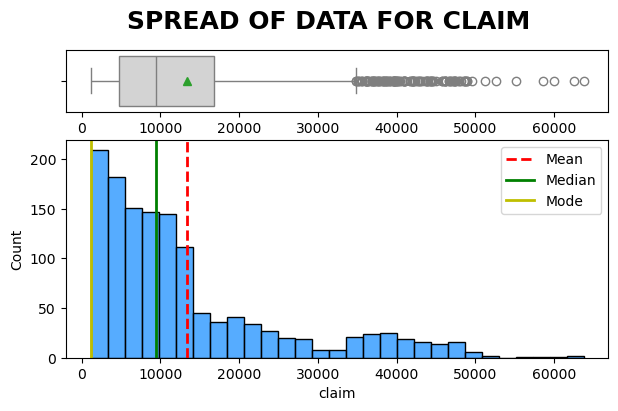

In [711]:
# Define the function
def dist_box(data):
    # Function plots a combined graph for univariate analysis of continuous variables 
    # to check spread, central tendency, dispersion, and outliers
    Name = data.name.upper()
    fig, (ax_box, ax_dis) = plt.subplots(2, 1, gridspec_kw={"height_ratios": (.2, .7)}, figsize=(7, 4))
    mean = data.mean()
    median = data.median()
    mode = data.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR " + Name, fontsize=18, fontweight='bold')
    sns.boxplot(x=data, showmeans=True, orient='h', color="lightgrey", ax=ax_box)
    ax_box.set(xlabel='')
    sns.histplot(data, kde=False, color='dodgerblue', ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--', linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-', linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-', linewidth=2)
    plt.legend({'Mean': mean, 'Median': median, 'Mode': mode})


dist_box(health_ins['claim'])

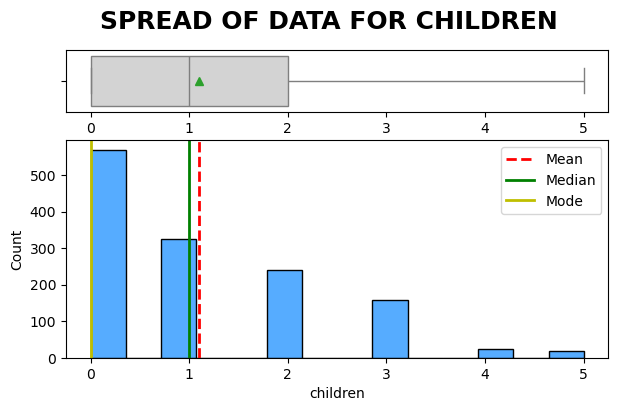

In [819]:
# Define the function
def dist_box(data):
    # Function plots a combined graph for univariate analysis of continuous variables 
    # to check spread, central tendency, dispersion, and outliers
    Name = data.name.upper()
    fig, (ax_box, ax_dis) = plt.subplots(2, 1, gridspec_kw={"height_ratios": (.2, .7)}, figsize=(7, 4))
    mean = data.mean()
    median = data.median()
    mode = data.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR " + Name, fontsize=18, fontweight='bold')
    sns.boxplot(x=data, showmeans=True, orient='h', color="lightgrey", ax=ax_box)
    ax_box.set(xlabel='')
    sns.histplot(data, kde=False, color='dodgerblue', ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--', linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-', linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-', linewidth=2)
    plt.legend({'Mean': mean, 'Median': median, 'Mode': mode})


dist_box(health_ins['children'])

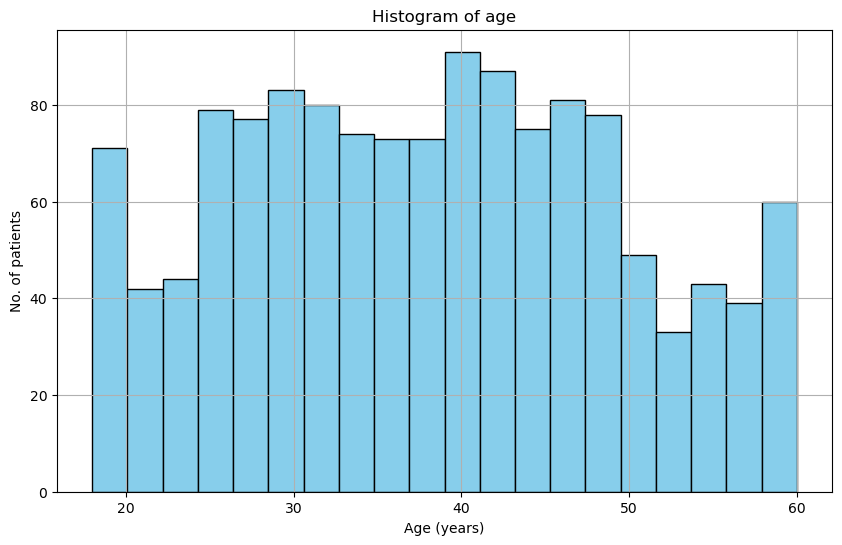

In [615]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot histogram for the 'age' column
plt.figure(figsize=(10, 6))
plt.hist(health_ins['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of age')
plt.xlabel('Age (years)')
plt.ylabel('No. of patients')
plt.grid(True)
plt.show()


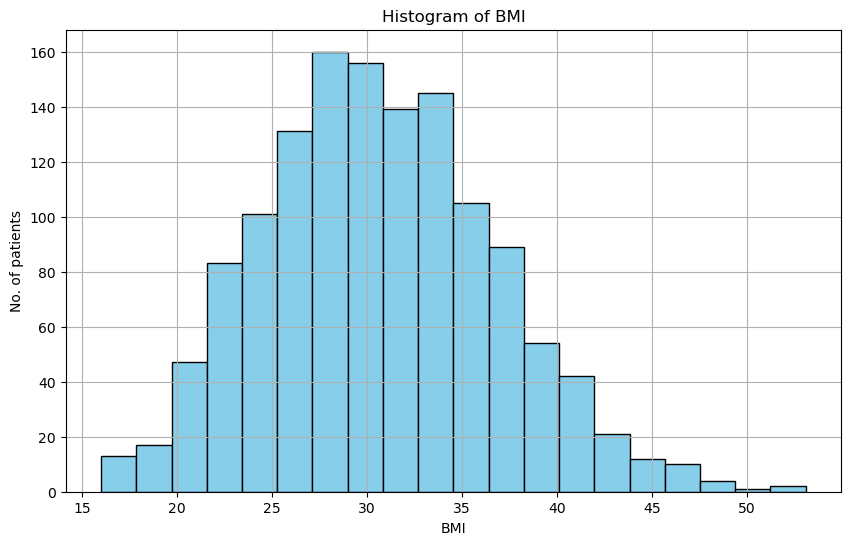

In [613]:
# Plot histogram for the 'bmi' column
plt.figure(figsize=(10, 6))
plt.hist(health_ins['bmi'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('No. of patients')
plt.grid(True)
plt.show()


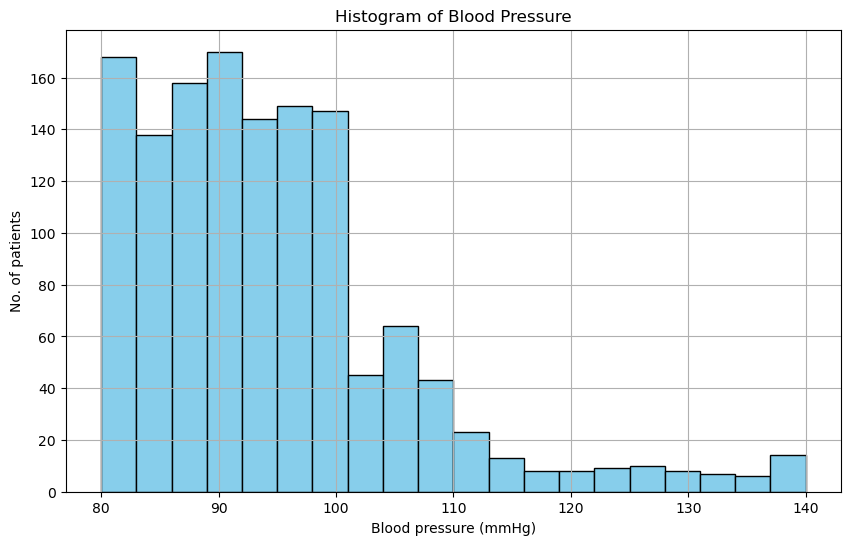

In [609]:
# Plot histogram for the 'bloodpressure' column
plt.figure(figsize=(10, 6))
plt.hist(health_ins['bloodpressure'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Blood Pressure')
plt.xlabel('Blood pressure (mmHg)')
plt.ylabel('No. of patients')
plt.grid(True)
plt.show()


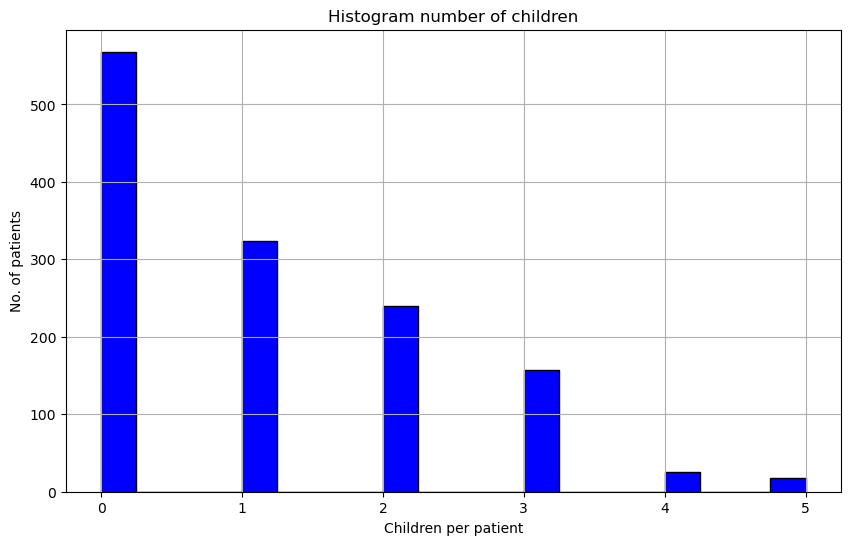

In [478]:
# Plot histogram for the 'children' column
plt.figure(figsize=(10, 6))
plt.hist(health_ins['children'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram number of children')
plt.xlabel('Children per patient')
plt.ylabel('No. of patients')
plt.grid(True)
plt.show()

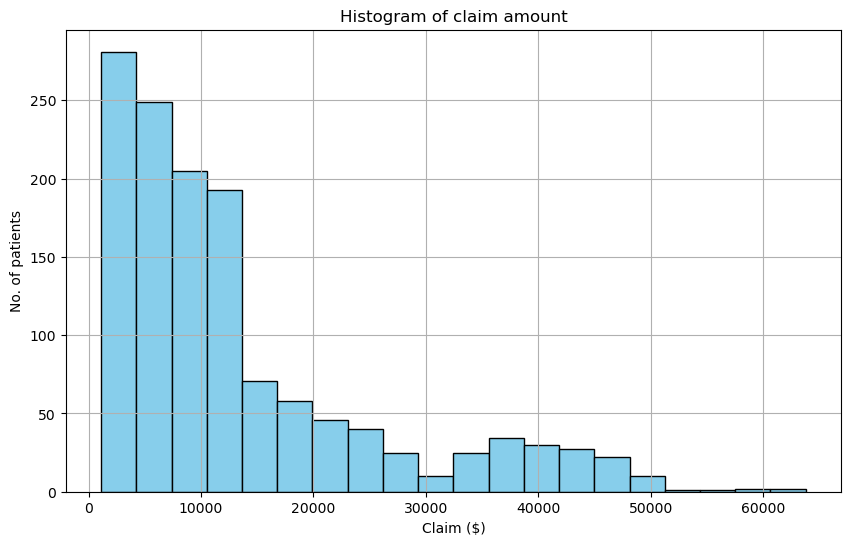

In [617]:
# Plot histogram for the 'claim' column
plt.figure(figsize=(10, 6))
plt.hist(health_ins['claim'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of claim amount')
plt.xlabel('Claim ($)')
plt.ylabel('No. of patients')
plt.grid(True)
plt.show()

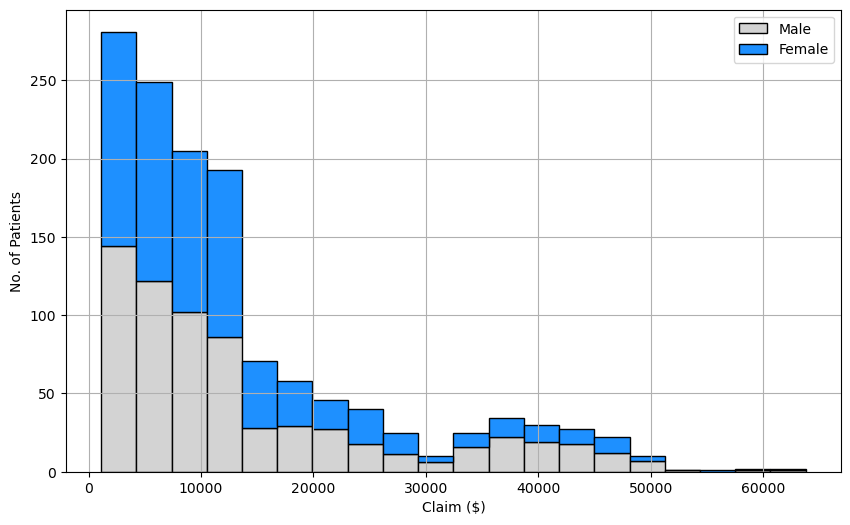

In [825]:
import matplotlib.pyplot as plt

# Prepare data for male and female groups
male_claims = health_ins[health_ins['gender'] == 'male']['claim']
female_claims = health_ins[health_ins['gender'] == 'female']['claim']

# Plot stacked histogram
plt.figure(figsize=(10, 6))
plt.hist([male_claims, female_claims], bins=20, color=['lightgrey', 'dodgerblue'], edgecolor='black', label=['Male', 'Female'], stacked=True)

plt.xlabel('Claim ($)')
plt.ylabel('No. of Patients')
plt.legend()
plt.grid(True)
plt.show()


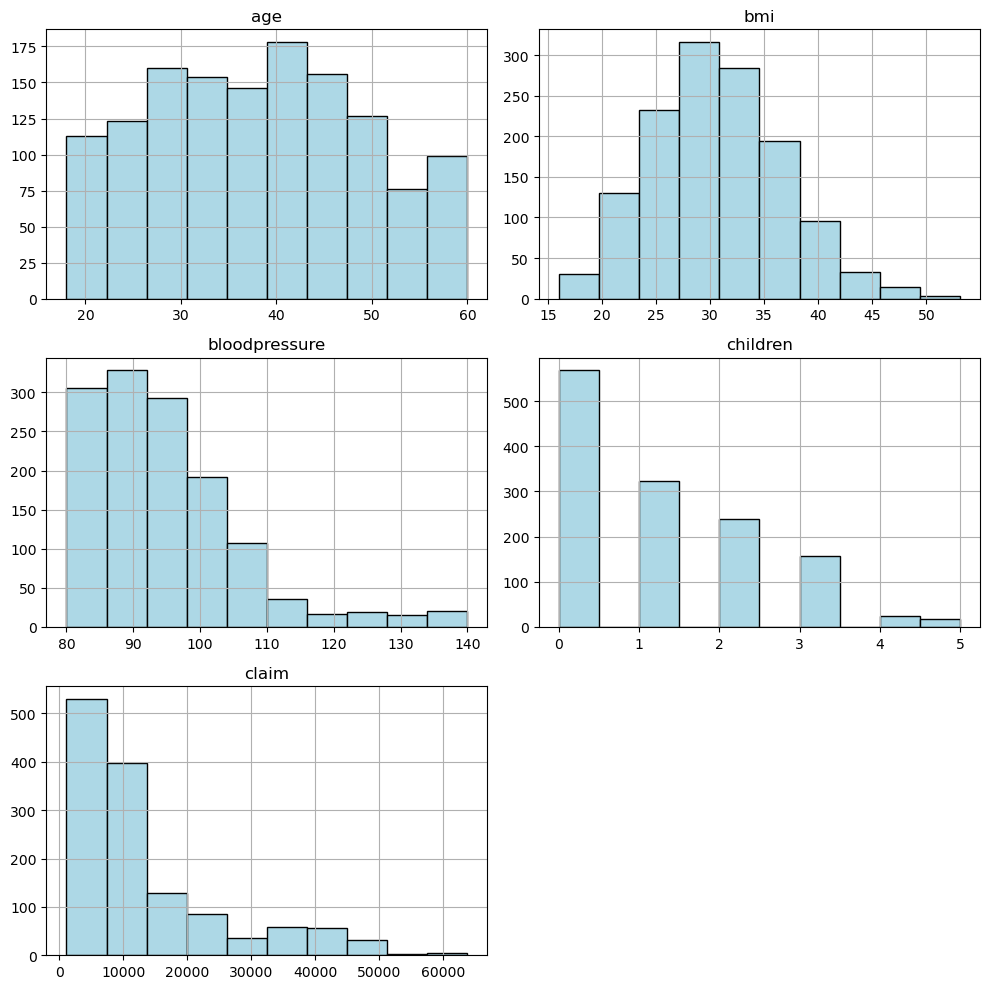

In [603]:
# Plot histograms for all numerical columns in the DataFrame
axes = numeric_columns.hist(layout=(3, 2), figsize=(10, 10), color='lightblue', edgecolor='black')

# Update the titles to sentence case
for ax in axes.flatten():
    title = ax.get_title()
 
# Display the plots
plt.tight_layout()
plt.show()



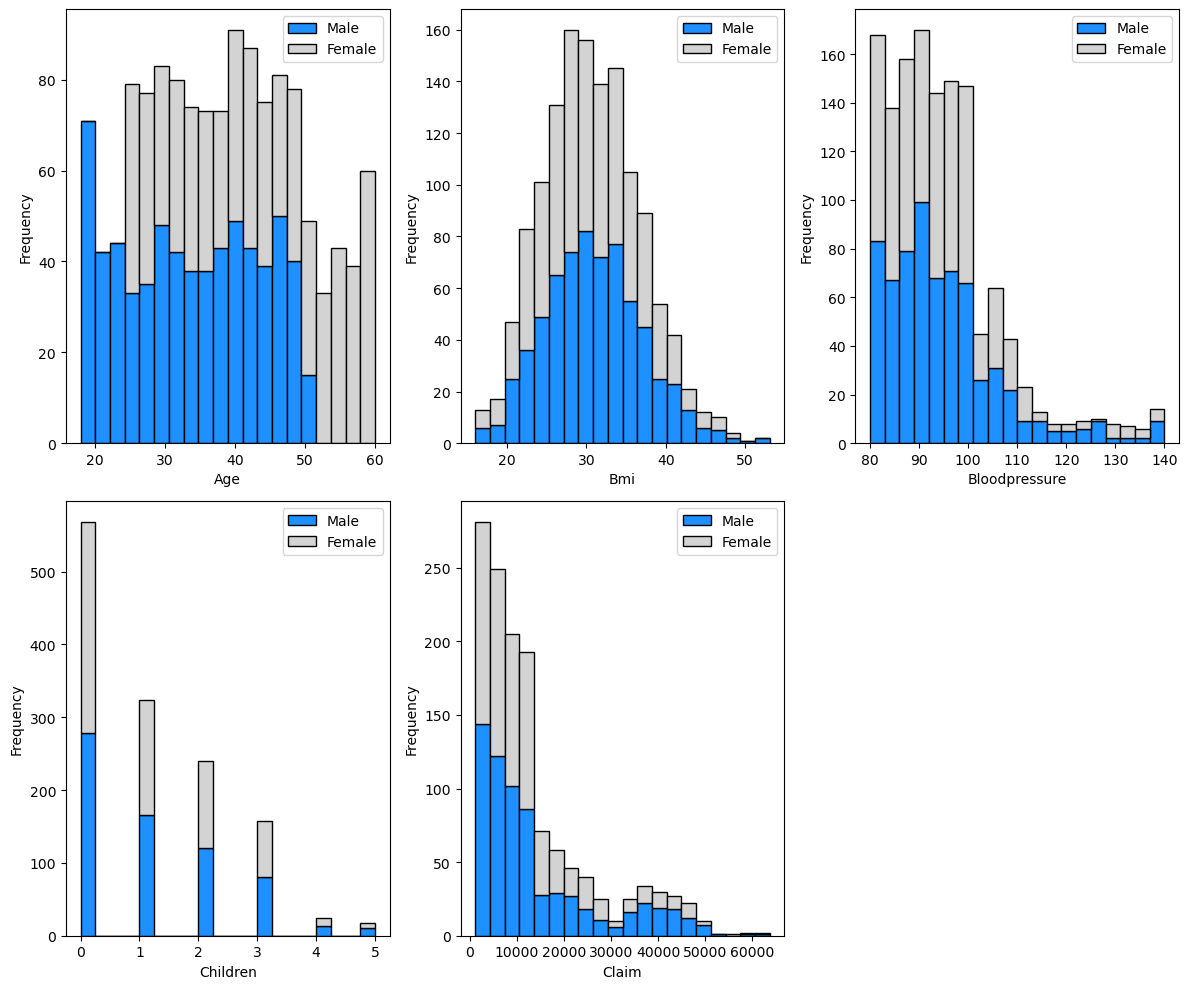

In [835]:
import matplotlib.pyplot as plt

# Assuming 'numeric_columns' is the DataFrame containing all numerical columns
numeric_columns = health_ins.select_dtypes(include='number')

# Determine the number of plots
num_plots = len(numeric_columns.columns)

# Create subplots in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numeric column, stacked by gender
for idx, column in enumerate(numeric_columns.columns):
    male_data = health_ins[health_ins['gender'] == 'male'][column]
    female_data = health_ins[health_ins['gender'] == 'female'][column]
    
    axes[idx].hist([male_data, female_data], bins=20, color=['dodgerblue', 'lightgrey'], edgecolor='black', label=['Male', 'Female'], stacked=True)
    axes[idx].set_xlabel(column.capitalize())
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

# Hide any unused subplots
for ax in axes[num_plots:]:
    ax.set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()



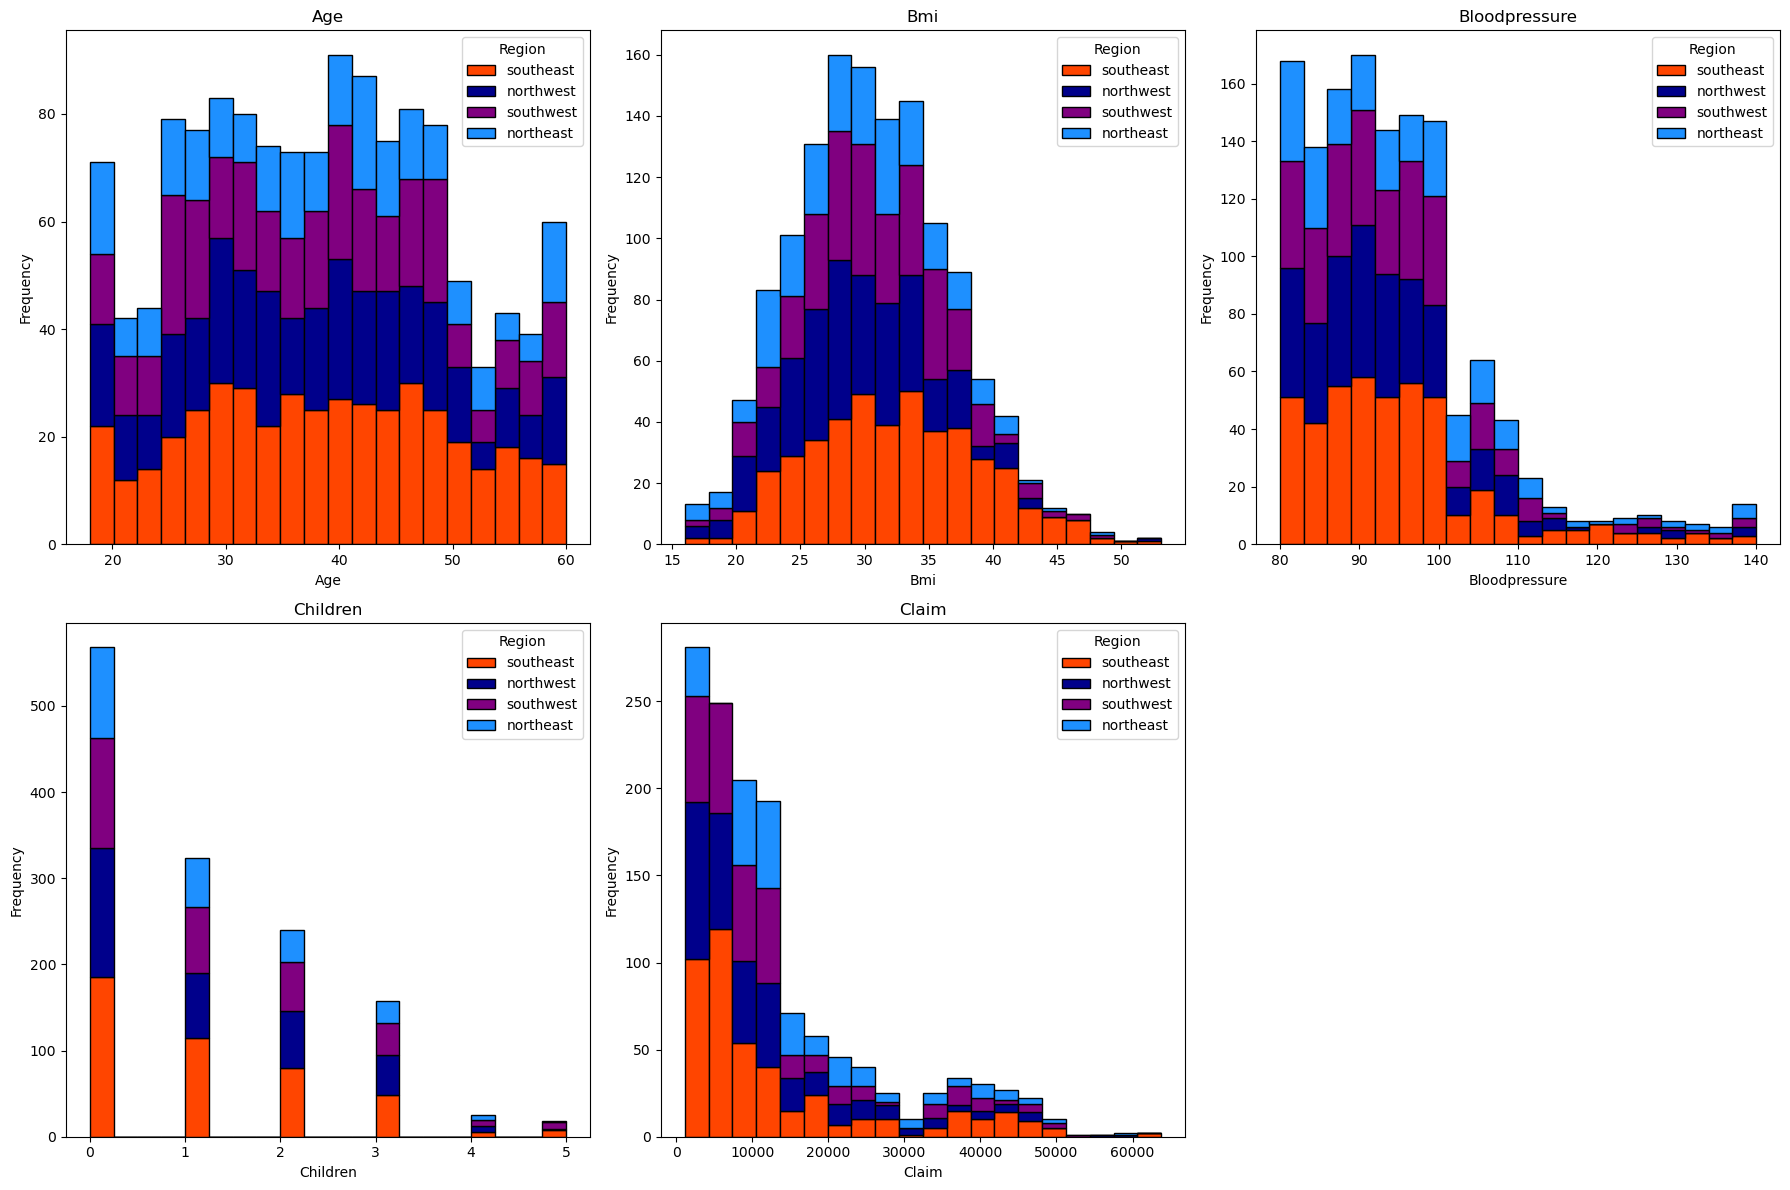

In [851]:


# Assuming 'numeric_columns' is the DataFrame containing all numerical columns
numeric_columns = health_ins.select_dtypes(include='number')

# Determine the number of plots
num_plots = len(numeric_columns.columns)

# Create subplots in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define the regions
regions = health_ins['region'].unique()

# Colors for each region
colors = ['orangered', 'darkblue', 'purple', 'dodgerblue']

# Plot histograms for each numeric column, stacked by region
for idx, column in enumerate(numeric_columns.columns):
    region_data = [health_ins[health_ins['region'] == region][column] for region in regions]
    
    axes[idx].hist(region_data, bins=20, color=colors, edgecolor='black', label=regions, stacked=True)
    axes[idx].set_title(column.capitalize())
    axes[idx].set_xlabel(column.capitalize())
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend(title='Region')

# Hide any unused subplots
for ax in axes[num_plots:]:
    ax.set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()



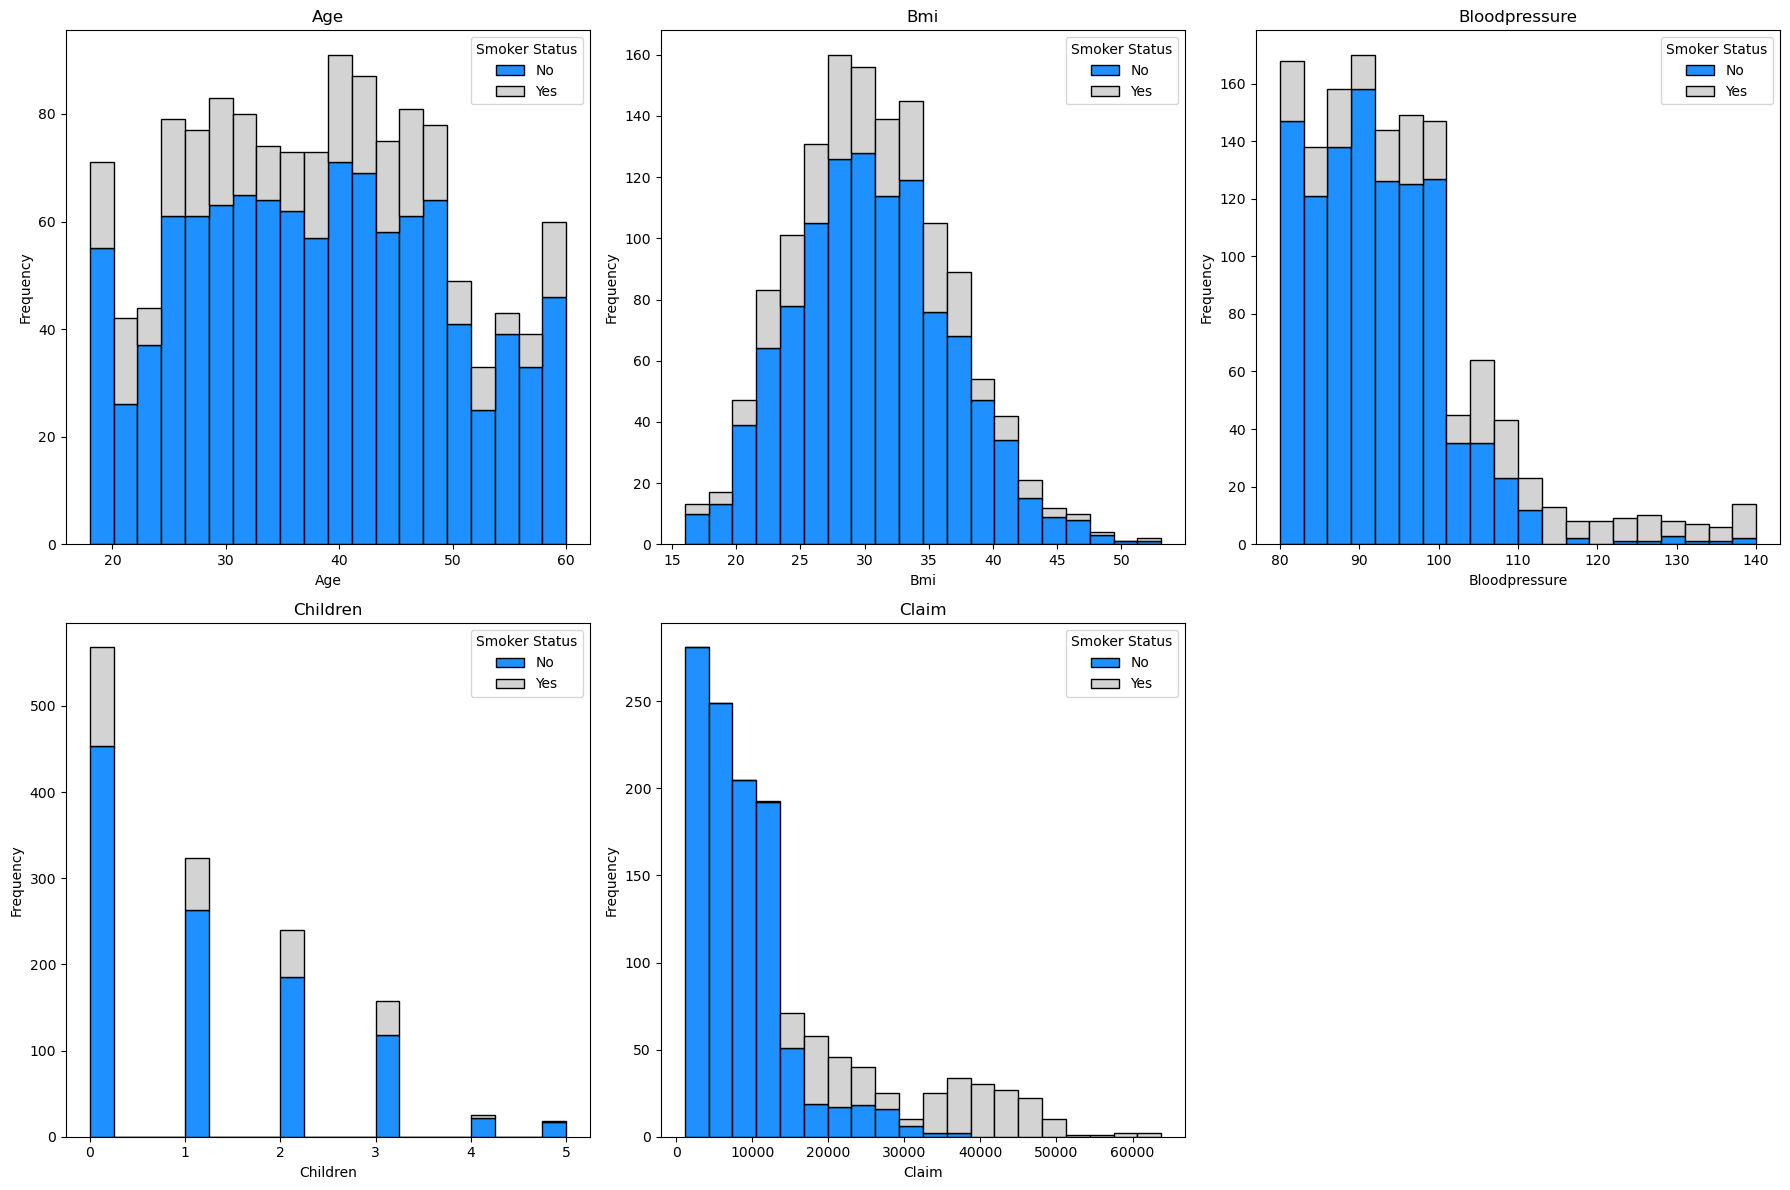

In [853]:
import matplotlib.pyplot as plt

# Assuming 'numeric_columns' is the DataFrame containing all numerical columns
numeric_columns = health_ins.select_dtypes(include='number')

# Determine the number of plots
num_plots = len(numeric_columns.columns)

# Create subplots in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define the smoker status
smoker_status = health_ins['smoker'].unique()

# Colors for each smoker status
colors = ['dodgerblue', 'lightgrey']

# Plot histograms for each numeric column, stacked by smoker status
for idx, column in enumerate(numeric_columns.columns):
    smoker_data = [health_ins[health_ins['smoker'] == status][column] for status in smoker_status]
    
    axes[idx].hist(smoker_data, bins=20, color=colors, edgecolor='black', label=smoker_status, stacked=True)
    axes[idx].set_title(column.capitalize())
    axes[idx].set_xlabel(column.capitalize())
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend(title='Smoker Status')

# Hide any unused subplots
for ax in axes[num_plots:]:
    ax.set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()


In [481]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Define features and target variable
X = health_ins.drop(columns=["gender", "diabetic", "smoker", "region"])
y = health_ins['claim']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [482]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [483]:
# Initialize the models
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()

In [484]:
# Train the models
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [485]:
# Make predictions on the test set
y_pred_lr = lr.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [486]:
# Calculate R-squared
r2_lr = r2_score(y_test, y_pred_lr)
r2_knn = r2_score(y_test, y_pred_knn)
r2_dt = r2_score(y_test, y_pred_dt)

In [487]:
# Calculate Adjusted R-squared
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

n = len(y_test)
k = X_test.shape[1]
adj_r2_lr = adjusted_r2(r2_lr, n, k)
adj_r2_knn = adjusted_r2(r2_knn, n, k)
adj_r2_dt = adjusted_r2(r2_dt, n, k)

In [488]:
# Calculate Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

In [489]:
# Calculate Mean Square Error (MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_dt = mean_squared_error(y_test, y_pred_dt)

In [490]:
# Calculate Root Mean Square Error (RMSE)
rmse_lr = np.sqrt(mse_lr)
rmse_knn = np.sqrt(mse_knn)
rmse_dt = np.sqrt(mse_dt)

In [491]:
# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)

In [492]:
# Print the metrics
print(f'Linear Regression:')
print(f'R-squared: {r2_lr}')
print(f'Adjusted R-squared: {adj_r2_lr}')
print(f'Mean Absolute Error (MAE): {mae_lr}')
print(f'Mean Square Error (MSE): {mse_lr}')
print(f'Root Mean Square Error (RMSE): {rmse_lr}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_lr}')

print(f'\nKNN:')
print(f'R-squared: {r2_knn}')
print(f'Adjusted R-squared: {adj_r2_knn}')
print(f'Mean Absolute Error (MAE): {mae_knn}')
print(f'Mean Square Error (MSE): {mse_knn}')
print(f'Root Mean Square Error (RMSE): {rmse_knn}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_knn}')

print(f'\nDecision Tree:')
print(f'R-squared: {r2_dt}')
print(f'Adjusted R-squared: {adj_r2_dt}')
print(f'Mean Absolute Error (MAE): {mae_dt}')
print(f'Mean Square Error (MSE): {mse_dt}')
print(f'Root Mean Square Error (RMSE): {rmse_dt}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_dt}')

Linear Regression:
R-squared: 1.0
Adjusted R-squared: 1.0
Mean Absolute Error (MAE): 3.4191209996426094e-12
Mean Square Error (MSE): 2.305126983703778e-23
Root Mean Square Error (RMSE): 4.801173797837127e-12
Mean Absolute Percentage Error (MAPE): 5.073179708317564e-14

KNN:
R-squared: 0.9999660531968854
Adjusted R-squared: 0.9999654028749866
Mean Absolute Error (MAE): 31.500382022471825
Mean Square Error (MSE): 4892.849961393226
Root Mean Square Error (RMSE): 69.94890965121063
Mean Absolute Percentage Error (MAPE): 0.19944900745452288

Decision Tree:
R-squared: 0.9997995075933807
Adjusted R-squared: 0.9997956667426792
Mean Absolute Error (MAE): 56.29082397003751
Mean Square Error (MSE): 28897.544804869005
Root Mean Square Error (RMSE): 169.99277868447533
Mean Absolute Percentage Error (MAPE): 0.31961542099083734


In [493]:
import pandas as pd
from tabulate import tabulate

# Define the metrics for each model
metrics = {
    'Performance Measure': [
        'R-squared', 'Adjusted R-squared', 'Mean Absolute Error (MAE)', 
        'Mean Square Error (MSE)', 'Root Mean Square Error (RMSE)', 
        'Mean Absolute Percentage Error (MAPE)'
    ],
    'Linear Regression': [
        r2_lr, adj_r2_lr, mae_lr, mse_lr, rmse_lr, f'{mape_lr:.2f}%'
    ],
    'KNN': [
        r2_knn, adj_r2_knn, mae_knn, mse_knn, rmse_knn, f'{mape_knn:.2f}%'
    ],
    'Decision Tree': [
        r2_dt, adj_r2_dt, mae_dt, mse_dt, rmse_dt, f'{mape_dt:.2f}%'
    ]
}

# Create a DataFrame to hold the metrics
df_metrics = pd.DataFrame(metrics)

# Print the table using tabulate for better formatting
print(tabulate(df_metrics, headers='keys', tablefmt='grid'))



+----+---------------------------------------+------------------------+--------------------+--------------------+
|    | Performance Measure                   | Linear Regression      | KNN                | Decision Tree      |
+====+=======================================+========================+====================+====================+
|  0 | R-squared                             | 1.0                    | 0.9999660531968854 | 0.9997995075933807 |
+----+---------------------------------------+------------------------+--------------------+--------------------+
|  1 | Adjusted R-squared                    | 1.0                    | 0.9999654028749866 | 0.9997956667426792 |
+----+---------------------------------------+------------------------+--------------------+--------------------+
|  2 | Mean Absolute Error (MAE)             | 3.4191209996426094e-12 | 31.500382022471825 | 56.29082397003751  |
+----+---------------------------------------+------------------------+-----------------

In [494]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv(r"C:\Users\ltye\OneDrive\Desktop\DA Notes\11 Capstone\health_ins.csv")

# Define features (X) and target variable (y)
# Drop the columns you don't want as features
X = data.drop(columns=["gender", "diabetic", "smoker", "region","children"])  
y = data["claim"]  # Set 'claim' as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")



Training set size: (1065, 4)
Test set size: (267, 4)


In [495]:
# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

# Evaluate the model
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
print("Linear Regression - MSE:", lr_mse, "MAE:", lr_mae, "R²:", lr_r2)


Linear Regression - MSE: 6.153511204806933e-24 MAE: 1.6912513836339283e-12 R²: 1.0


In [496]:
# Initialize and train the KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can tune 'n_neighbors' using GridSearchCV
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)
print("KNN - MSE:", knn_mse, "MAE:", knn_mae, "R²:", knn_r2)


KNN - MSE: 4892.849961393226 MAE: 31.500382022471825 R²: 0.9999660531968854


In [497]:
# Initialize and train the SVM Regressor
svm = SVR(kernel='rbf')  # You can tune the kernel, C, and gamma parameters
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
svm_mse = mean_squared_error(y_test, y_pred_svm)
svm_mae = mean_absolute_error(y_test, y_pred_svm)
svm_r2 = r2_score(y_test, y_pred_svm)
print("SVM - MSE:", svm_mse, "MAE:", svm_mae, "R²:", svm_r2)


SVM - MSE: 155383153.3578082 MAE: 8041.1783841477645 R²: -0.07805498962525581


In [498]:
# Initialize and train the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42, max_depth=5)  # You can tune 'max_depth'
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)
print("Decision Tree - MSE:", dt_mse, "MAE:", dt_mae, "R²:", dt_r2)


Decision Tree - MSE: 210291.09231582738 MAE: 342.4780329675183 R²: 0.9985409913723222


In [499]:
df_encoded = pd.get_dummies(health_ins)

df_encoded.head()

,age,bmi,bloodpressure,children,claim,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
0,39.0,23.2,91,0,1121.87,False,True,False,True,True,False,False,False,True,False
1,24.0,30.1,87,0,1131.51,False,True,True,False,True,False,False,False,True,False
7,19.0,41.1,100,0,1146.80,False,True,True,False,True,False,False,True,False,False
8,20.0,43.0,86,0,1149.40,False,True,True,False,True,False,False,True,False,False
9,30.0,53.1,97,0,1163.46,False,True,True,False,True,False,False,True,False,False


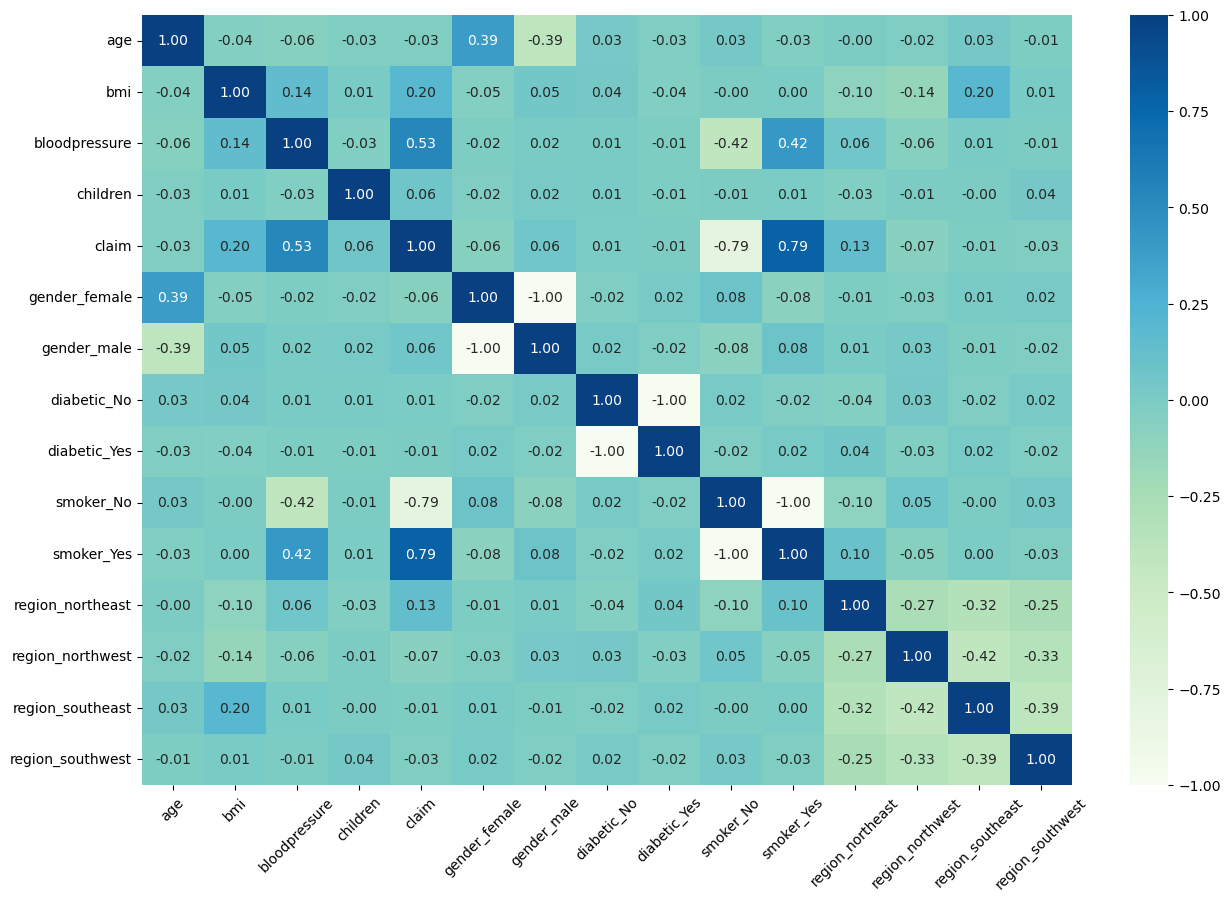

In [891]:
fig = plt.figure(figsize=(15,10))
encoded_corr = df_encoded.corr()

sns.heatmap(encoded_corr, annot = True, fmt='.2f', cmap='GnBu')

# Skew the x-axis labels by 45 degrees 
plt.xticks(rotation=45)

plt.show()

In [503]:


# Define features and target variable
X = df_encoded.drop(columns=['claim'])
y = df_encoded['claim']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [551]:
from sklearn.ensemble import RandomForestRegressor 

# Initialize the models
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
svm = SVR()

In [555]:
# Train the models
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVR()

In [567]:
# Make predictions on the test set
y_pred_lr = lr.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [569]:
# Calculate R-squared
r2_lr = r2_score(y_test, y_pred_lr)
r2_knn = r2_score(y_test, y_pred_knn)
r2_dt = r2_score(y_test, y_pred_dt)
r2_rf = r2_score(y_test, y_pred_rf)
r2=svm = r2_score(y_test, y_pred_svm)

In [571]:
# Calculate Adjusted R-squared
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

n = len(y_test)
k = X_test.shape[1]
adj_r2_lr = adjusted_r2(r2_lr, n, k)
adj_r2_knn = adjusted_r2(r2_knn, n, k)
adj_r2_dt = adjusted_r2(r2_dt, n, k)
adj_r2_rf = adjusted_r2(r2_rf, n, k)
adj_r2_svm = adjusted_r2(r2_svm, n, k)

In [573]:
# Calculate Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_svm = mean_absolute_error(y_test, y_pred_svm)

In [575]:
# Calculate Mean Square Error (MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_svm = mean_squared_error(y_test, y_pred_svm)

In [577]:
# Calculate Root Mean Square Error (RMSE)
rmse_lr = np.sqrt(mse_lr)
rmse_knn = np.sqrt(mse_knn)
rmse_dt = np.sqrt(mse_dt)
rmse_rf = np.sqrt(mse_rf)
rmse_svm = np.sqrt(mse_svm)

In [579]:
# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
mape_svm = mean_absolute_percentage_error(y_test, y_pred_svm)

In [713]:
from tabulate import tabulate

# Define the metrics for each model
metrics = {
    'Performance Measure': [
        'R-squared', 'Adjusted R-squared', 'Mean Absolute Error (MAE)', 
        'Mean Square Error (MSE)', 'Root Mean Square Error (RMSE)', 
        'Mean Absolute Percentage Error (MAPE)'
    ],
    'Linear Regression': [
        r2_lr, adj_r2_lr, mae_lr, mse_lr, rmse_lr, f'{mape_lr:.2f}%'
    ],
    'KNN': [
        r2_knn, adj_r2_knn, mae_knn, mse_knn, rmse_knn, f'{mape_knn:.2f}%'
    ],
    'Decision Tree': [
        r2_dt, adj_r2_dt, mae_dt, mse_dt, rmse_dt, f'{mape_dt:.2f}%'
    ],
    'Random Forest Regressor': [
        r2_rf, adj_r2_rf, mae_rf, mse_rf, rmse_rf, f'{mape_rf:.2f}%'
        ]
}

# Create a DataFrame to hold the metrics
df_metrics = pd.DataFrame(metrics)

# Print the table using tabulate for better formatting
print(tabulate(df_metrics, headers='keys', tablefmt='grid'))



+----+---------------------------------------+---------------------+---------------------+--------------------+---------------------------+
|    | Performance Measure                   | Linear Regression   | KNN                 | Decision Tree      | Random Forest Regressor   |
+====+=======================================+=====================+=====================+====================+===========================+
|  0 | R-squared                             | 0.7303130998448941  | 0.3054402550997318  | 0.5729310032685047 | 0.8191146470652592        |
+----+---------------------------------------+---------------------+---------------------+--------------------+---------------------------+
|  1 | Adjusted R-squared                    | 0.7153304942807215  | 0.26685360260527247 | 0.5492049478945327 | 0.8090654607911069        |
+----+---------------------------------------+---------------------+---------------------+--------------------+---------------------------+
|  2 | Mean Absolute

<Figure size 1400x800 with 0 Axes>

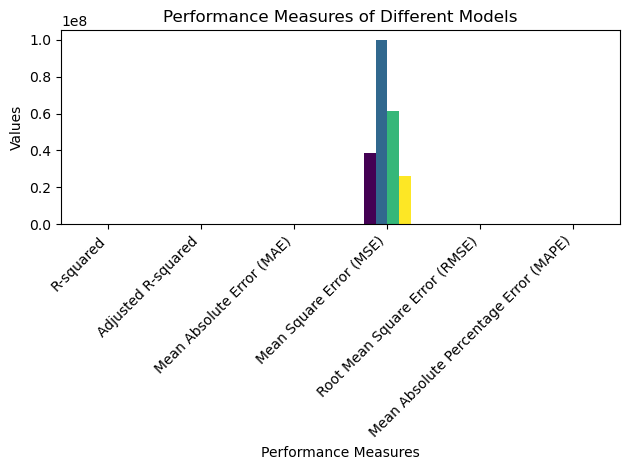

C:\Users\ltye\AppData\Local\Temp\ipykernel_30028\735577282.py:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




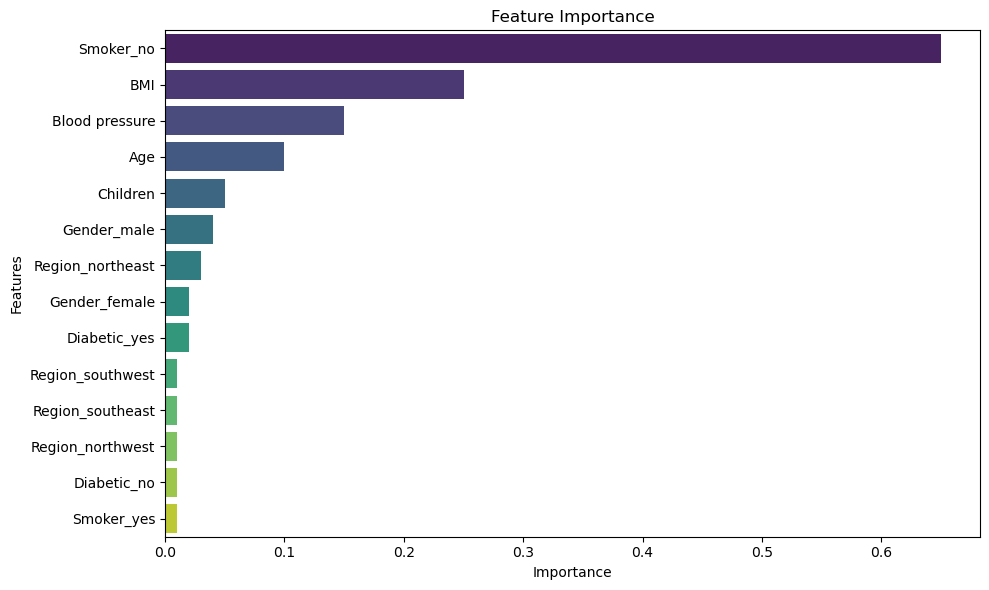

In [777]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the performance measures
metrics = ['R-squared', 'Adjusted R-squared', 'Mean Absolute Error (MAE)', 
           'Mean Square Error (MSE)', 'Root Mean Square Error (RMSE)', 
           'Mean Absolute Percentage Error (MAPE)']
linear_regression = [0.7303130998448941, 0.7153304942807215, 4910.906546802687, 38870745.34106958, 6234.640754772449, 64.36]
knn = [0.3054402550997318, 0.26685360260527247, 7155.000194756553, 100108885.35056429, 10005.442786332062, 95.22]
decision_tree = [0.5729310032685047, 0.5492049478945327, 5311.73808988764, 61554677.68537716, 7845.678918065482, 78.07]
random_forest_regressor = [0.8191146470652592, 0.8090654607911069, 3873.061771535579, 26071523.999912333, 5106.0282020286895, 60.85]

performance_data = {
    'Metrics': metrics,
    'Linear Regression': linear_regression,
    'KNN': knn,
    'Decision Tree': decision_tree,
    'Random Forest Regressor': random_forest_regressor
}

df_performance = pd.DataFrame(performance_data)

# Data for feature importance
features = ['Smoker_no', 'BMI', 'Blood pressure', 'Age', 'Children', 'Gender_male', 
            'Region_northeast', 'Gender_female', 'Diabetic_yes', 'Region_southwest', 
            'Region_southeast', 'Region_northwest', 'Diabetic_no', 'Smoker_yes']
importance = [0.65, 0.25, 0.15, 0.1, 0.05, 0.04, 0.03, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01]

# Plotting the performance measures
plt.figure(figsize=(14, 8))
df_performance.set_index('Metrics').plot(kind='bar', colormap='viridis')
plt.title('Performance Measures of Different Models')
plt.xlabel('Performance Measures')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Models')
plt.legend().remove() # Remove the legend
plt.tight_layout()

# Show the performance measures plot
plt.show()

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.tight_layout()

# Show the feature importance plot
plt.show()


<Figure size 1400x800 with 0 Axes>

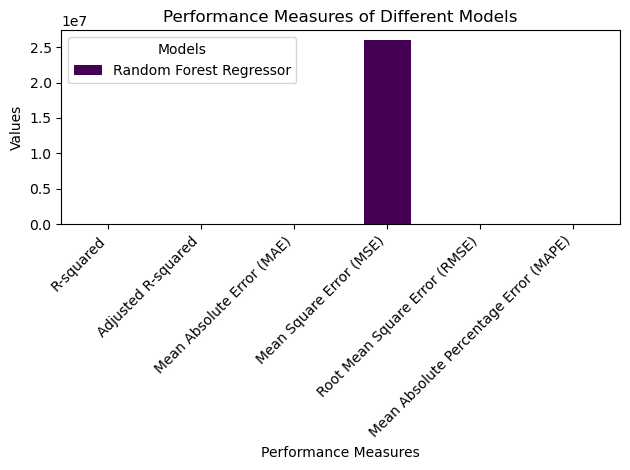

C:\Users\ltye\AppData\Local\Temp\ipykernel_30028\48392251.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




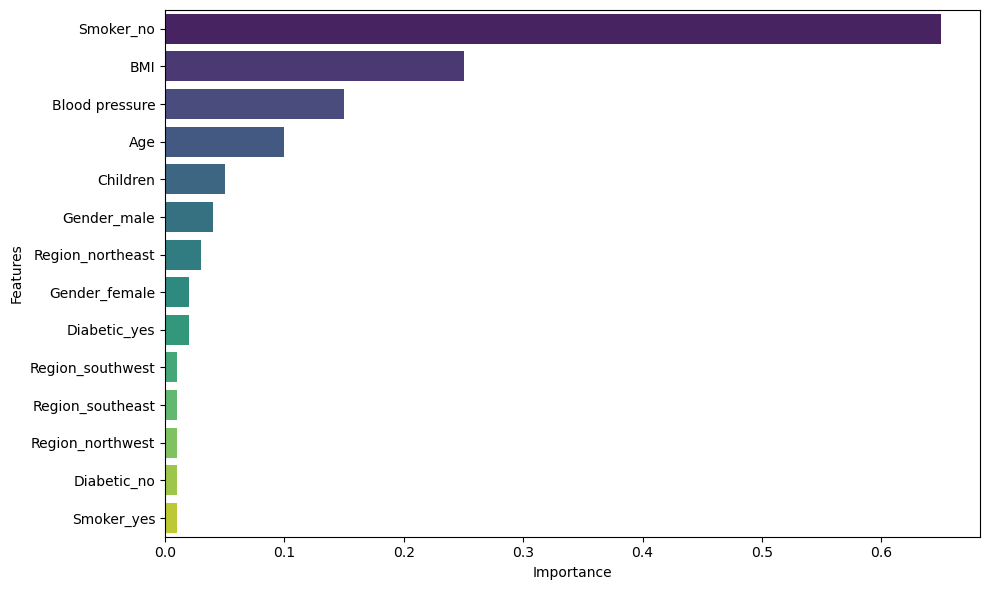

In [753]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the performance measures
metrics = ['R-squared', 'Adjusted R-squared', 'Mean Absolute Error (MAE)', 
           'Mean Square Error (MSE)', 'Root Mean Square Error (RMSE)', 
           'Mean Absolute Percentage Error (MAPE)']
random_forest_regressor = [0.8191146470652592, 0.8090654607911069, 3873.061771535579, 26071523.999912333, 5106.0282020286895, 60.85]

performance_data = {
    'Metrics': metrics,
    'Random Forest Regressor': random_forest_regressor
}

df_performance = pd.DataFrame(performance_data)

# Data for feature importance
features = ['Smoker_no', 'BMI', 'Blood pressure', 'Age', 'Children', 'Gender_male', 
            'Region_northeast', 'Gender_female', 'Diabetic_yes', 'Region_southwest', 
            'Region_southeast', 'Region_northwest', 'Diabetic_no', 'Smoker_yes']
importance = [0.65, 0.25, 0.15, 0.1, 0.05, 0.04, 0.03, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01]

# Plotting the performance measures
plt.figure(figsize=(14, 8))
df_performance.set_index('Metrics').plot(kind='bar', colormap='viridis')
plt.title('Performance Measures of Different Models')
plt.xlabel('Performance Measures')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Models')
plt.tight_layout()

# Show the performance measures plot
plt.show()

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()

# Show the feature importance plot
plt.show()



Region: southeast


Region: northwest


Region: southwest


Region: northeast



<Figure size 1200x800 with 0 Axes>

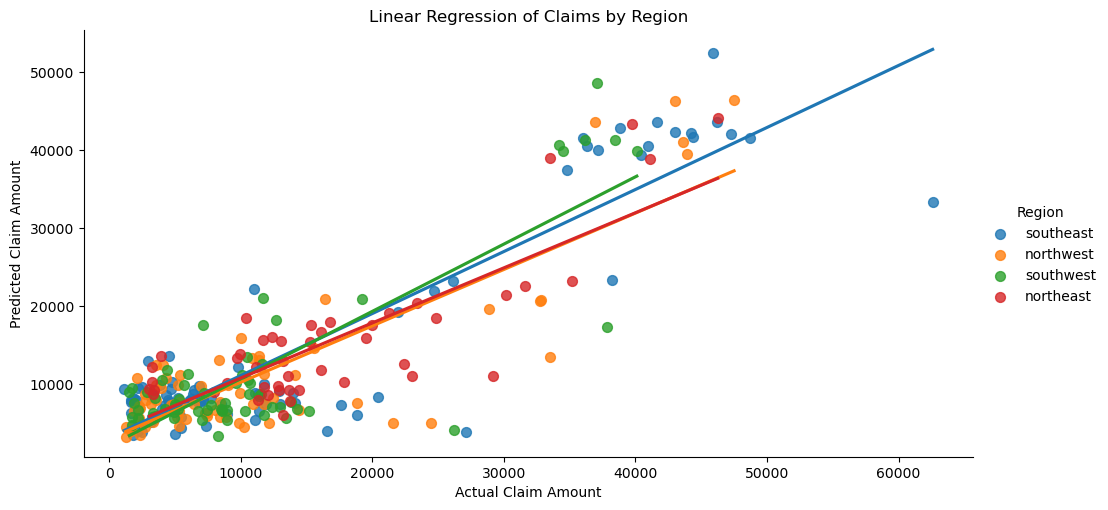

In [801]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'health_ins' DataFrame is already created and contains the relevant data
# Define the regions variable
regions = health_ins['region'].unique()

# Initialize StandardScaler
s = StandardScaler()

actuals = []
preds = []
region_labels = []

# Define the numerical and categorical features
numerical_features = ['age', 'bmi', 'bloodpressure', 'children']  # Add your numerical features
categorical_features = ['gender', 'smoker']  # Exclude 'region' as it's used for filtering

# Check if all specified columns exist in the DataFrame
for feature in numerical_features + categorical_features:
    if feature not in health_ins.columns:
        raise ValueError(f"Column '{feature}' is not present in the DataFrame")

# One-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

for i in regions:
    # Filter data by region
    print("\nRegion: {}\n".format(i))
    ins_df = health_ins[health_ins['region'] == i]
    X = ins_df[numerical_features + categorical_features]
    y = ins_df['claim']
    
    # Transform the features (scale numerical and encode categorical)
    X_transformed = preprocessor.fit_transform(X)
    
    # Add polynomial features
    pf = PolynomialFeatures(degree=2, include_bias=False)
    X_pf = pd.DataFrame(data=pf.fit_transform(X_transformed), columns=pf.get_feature_names_out(input_features=numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out())))
    
    # Create training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.2, random_state=42)
    
    # Train a Random Forest Regressor
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Collect actual and predicted values for plotting
    actuals.extend(y_test)
    preds.extend(y_pred)
    region_labels.extend([i] * len(y_test))  # Add region labels for each test sample

# Create DataFrame for plotting
plot_df = pd.DataFrame({'Actual': actuals, 'Predicted': preds, 'Region': region_labels})

# Plot linear regression chart
plt.figure(figsize=(12, 8))
sns.lmplot(x='Actual', y='Predicted', hue='Region', data=plot_df, aspect=2, ci=None, scatter_kws={'s': 50})
plt.title('Linear Regression of Claims by Region')
plt.xlabel('Actual Claim Amount')
plt.ylabel('Predicted Claim Amount')
plt.show()

